In [5]:
!pip install bs4

In [6]:
!pip install requests

In [9]:
from bs4 import BeautifulSoup

In [10]:
import requests

In [11]:
import pandas as pd

In [12]:
URL="https://open.spotify.com/artist/1mYsTxnqsietFxj1OgoGbG"

In [16]:
import requests
import base64

def get_access_token(client_id, client_secret):
    auth_url = 'https://accounts.spotify.com/api/token'
    auth_header = base64.b64encode((client_id + ':' + client_secret).encode('ascii')).decode('ascii')
    headers = {
        'Authorization': 'Basic ' + auth_header,
        'Content-Type': 'application/x-www-form-urlencoded'
    }
    data = {
        'grant_type': 'client_credentials'
    }
    response = requests.post(auth_url, headers=headers, data=data)
    
    # Add debug logging
    if response.status_code != 200:
        print("Error:", response.status_code)
        print("Response:", response.text)
        raise Exception('Failed to obtain access token')

    return response.json()['access_token']

client_id = '82d1d4ae2ba14c15ab3e4b6f6dac673a'
client_secret = '76fc10155b3240a3a22de479c9a223d6'
access_token = get_access_token(client_id, client_secret)
print(access_token)



BQDNiyono7dawYfe4Iii8TzIfAn87FdAe_jHAXShbnVGhyNZauAv0nwJnmu0_iAlQU_-Z73XCgpgMxxrsc0YUjHzsu1oV0knFtcq3g1AXD6OmX11P8I


In [24]:
import requests
import base64
import csv

def get_access_token(client_id, client_secret):
    auth_url = 'https://accounts.spotify.com/api/token'
    auth_header = base64.b64encode((client_id + ':' + client_secret).encode('ascii')).decode('ascii')
    headers = {
        'Authorization': 'Basic ' + auth_header,
        'Content-Type': 'application/x-www-form-urlencoded'
    }
    data = {
        'grant_type': 'client_credentials'
    }
    response = requests.post(auth_url, headers=headers, data=data)
    
    # Add debug logging
    if response.status_code != 200:
        print("Error:", response.status_code)
        print("Response:", response.text)
        raise Exception('Failed to obtain access token')

    return response.json()['access_token']

def get_artist_info(artist_name, access_token):
    search_url = 'https://api.spotify.com/v1/search'
    headers = {
        'Authorization': 'Bearer ' + access_token
    }
    params = {
        'q': artist_name,
        'type': 'artist',
        'limit': 1
    }
    response = requests.get(search_url, headers=headers, params=params)
    if response.status_code == 200:
        artist_data = response.json()
        if artist_data['artists']['items']:
            artist = artist_data['artists']['items'][0]
            artist_info = {
                'name': artist['name'],
                'followers': artist['followers']['total'],
                'popularity': artist['popularity'],
                'spotify_url': artist['external_urls']['spotify']
            }
            return artist_info
        else:
            return None
    else:
        print("Error:", response.status_code)
        print("Response:", response.text)
        raise Exception('Failed to search for artist')

def save_artists_info_to_csv(artists_info, filename='artists_info.csv'):
    with open(filename, mode='w', newline='', encoding='utf-8') as file:
        writer = csv.writer(file)
        writer.writerow(['Name', 'Followers','Popularity', 'Spotify URL'])
        for artist_info in artists_info:
            writer.writerow([
                artist_info['name'],
                artist_info['followers'],
                artist_info['popularity'],
                artist_info['spotify_url']
            ])

client_id = '82d1d4ae2ba14c15ab3e4b6f6dac673a'
client_secret = '76fc10155b3240a3a22de479c9a223d6'
access_token = get_access_token(client_id, client_secret)


artist_names = ['A.R. Rahman','Anirudh Ravichander', 'Santosh Narayanan','Harris Jayaraj','Dhee','Sid Sriram','Ilaiyaraaja','Yuvan Shankar Raja']

artists_info = []
for artist_name in artist_names:
    artist_info = get_artist_info(artist_name, access_token)
    if artist_info:
        artists_info.append(artist_info)
    else:
        print(f"No information found for artist '{artist_name}'")

if artists_info:
    save_artists_info_to_csv(artists_info)
    print(f"Artist information saved to 'artists_info.csv'")
else:
    print("No artist information was found to save.")


Artist information saved to 'artists_info.csv'


In [2]:
#Predict follower count or popularity scores based on numerical features.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [3]:
data = pd.read_csv('artists_info.csv')

In [6]:
X=data[['Followers']]
y=data[['Popularity']]

In [8]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [9]:
model=LinearRegression()

In [10]:
model.fit(X_train,y_train)

LinearRegression()

In [11]:
y_pred = model.predict(X_test)

In [12]:
print(y_pred)

[[71.46399073]
 [67.99629171]]


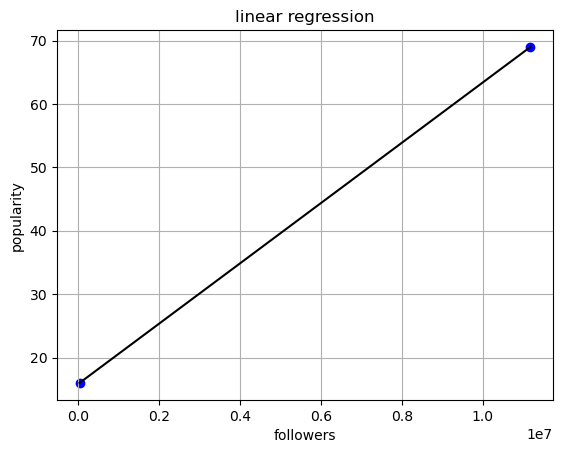

In [16]:
plt.scatter(X_test,y_test, color="blue")
plt.plot(X_test,y_test,color="black")
plt.xlabel('followers')
plt.ylabel('popularity')
plt.title('linear regression')
plt.grid()